In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

from glob import glob
import numpy as np

from hubble_focus import analysis, focusmodel

# Read in archived datasets

`analysis.Analysis` reads in all archived datasets, creates per-visit averages, and generates model components (and model-subtracted measurements) on the fly.

Here, `data.fitpsf` gives the individual measurements (per star per image), `data.visit` creates the visit-averaged products, and `data.moves` holds the SM moves.

In [2]:
data = analysis.Analysis(thermal_path = '.')

INFO:hubble_focus.analysis:Querying the archive...
INFO:hubble_focus.analysis:Generating model...


NameError: name 'atime' is not defined

# Regular Reporting Suite

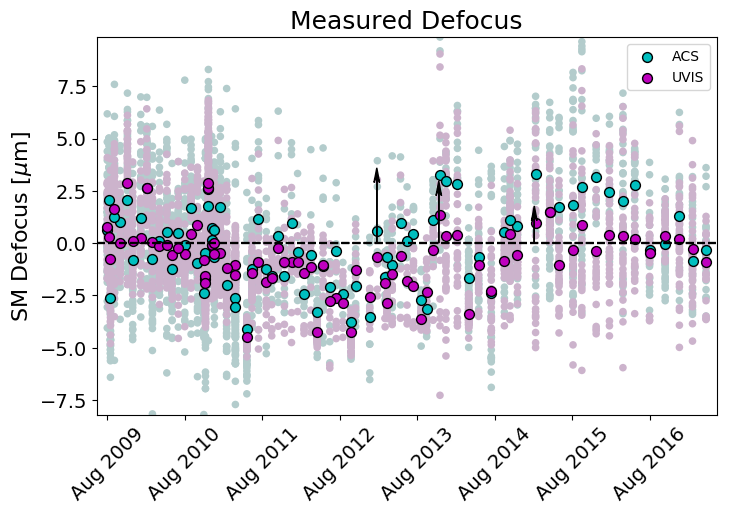

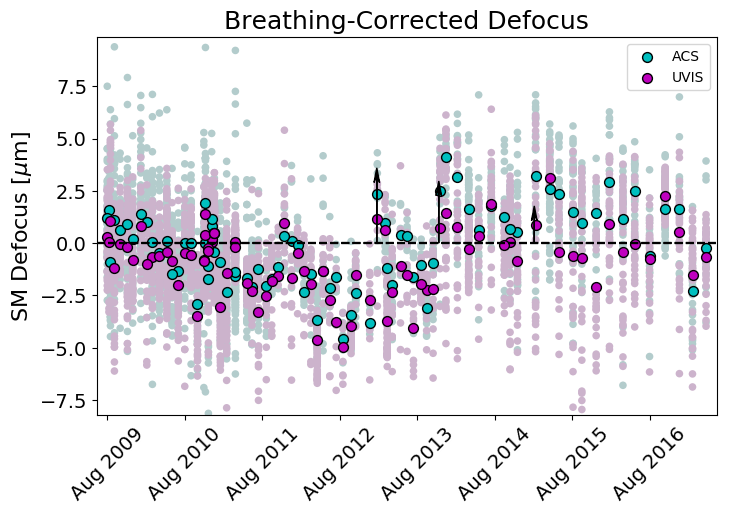

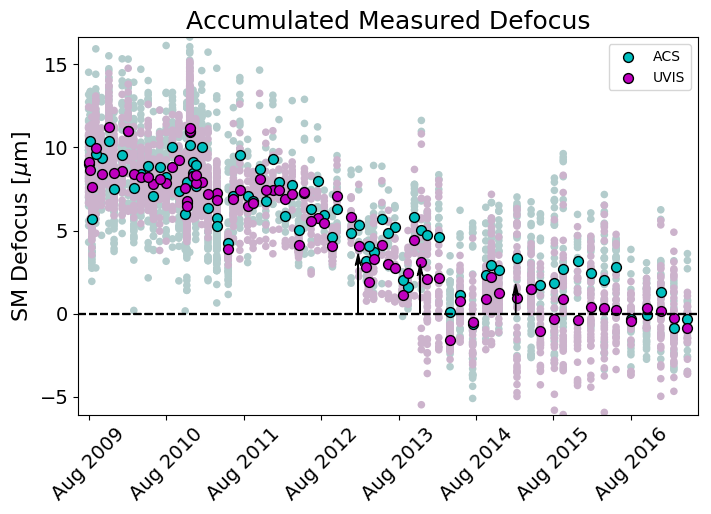

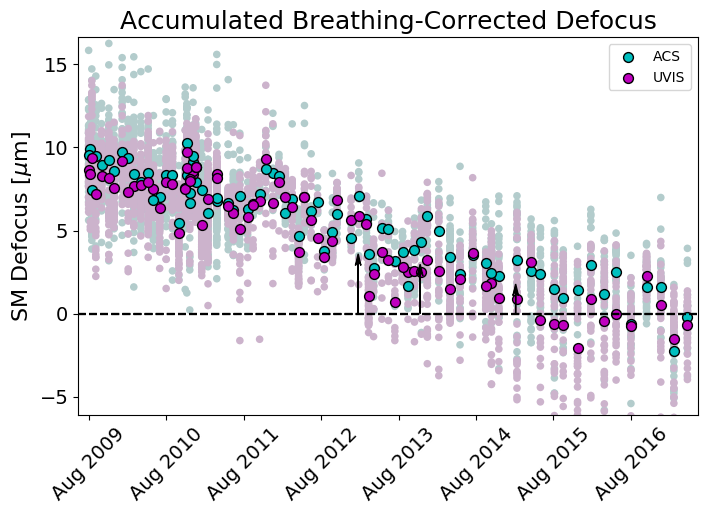

In [4]:
data.plot_suite(figsize = (8, 5))

# Overplot model components

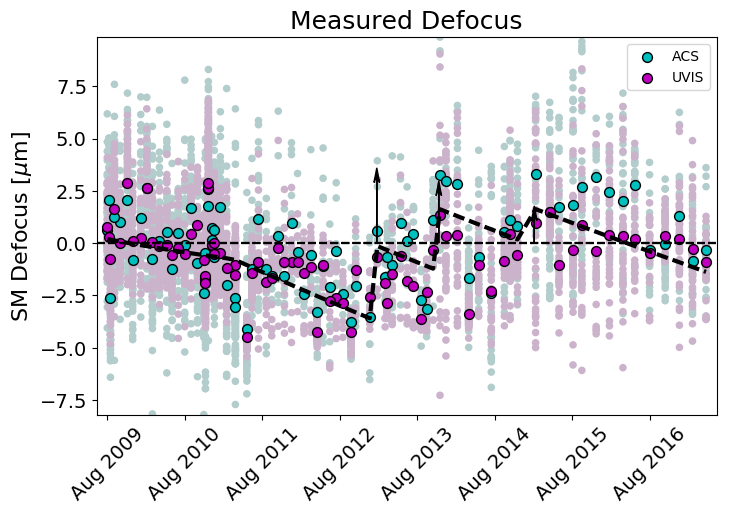

In [5]:
data.plot_suite(figsize = (8, 5), figures=[1,])
data.plot_line(data.fitpsf['mjd'],data.fitpsf['secular_model_steps'])

# Regression lines

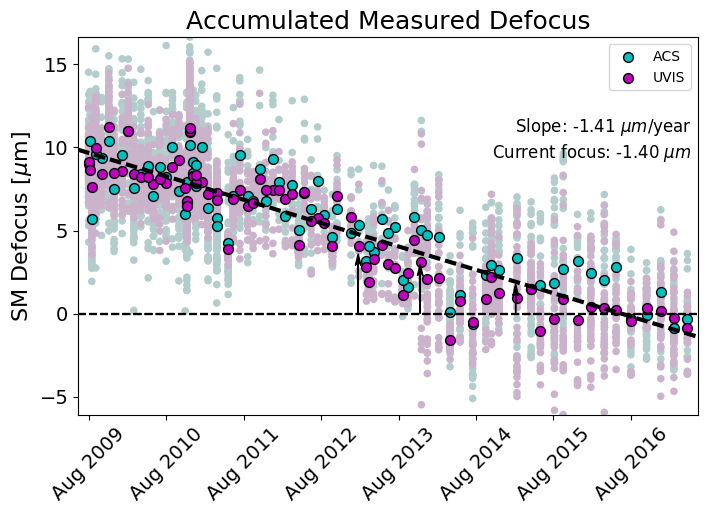

In [6]:
# fit all data after January 1st, 2013
start = data._toMJD('2013.01.01')
idx = data.visit['mjd_mean'] >= start

line_x, line_y, slope = data.line_fit(data.visit['mjd_mean'],data.visit['dSM_mean'] + data.visit['accumSM_mean'])
current = line_y[-1]

data.plot_suite(figsize = (8, 5), figures=[3,])
data.plot_line(line_x,line_y)

plt.text(0.99,0.75,'Slope: {:+.2f} $\mu m$/year'.format(slope*365),
    fontsize=12,transform=plt.gca().transAxes, horizontalalignment='right')
plt.text(0.99,0.68,'Current focus: {:+.2f} $\mu m$'.format(current),
    fontsize=12,transform=plt.gca().transAxes, horizontalalignment='right')

# Plotting Cameras against Model Components

In [7]:
acs, uvis = data.split_cam_chip(data.fitpsf, 'camera') # Get indices for separate cameras
model_mjd, model = focusmodel.orbital((57674.61, 57674.7), thermal_path = '.') # Generate model on telemetry sampling

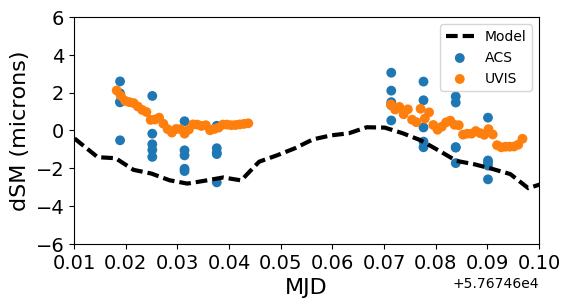

In [8]:
fig = plt.figure(figsize=(6,3))
acs = data.scatter_plot(data.fitpsf['mjd'][acs],data.fitpsf['dSM'][acs])
acs.set_label('ACS')
uvis = data.scatter_plot(data.fitpsf['mjd'][uvis],data.fitpsf['dSM'][uvis])
uvis.set_label('UVIS')
model_line = data.plot_line(model_mjd,model)
model_line.set_label('Model')

plt.xlim(57674.61, 57674.7)
plt.ylim(-6, 6.)

plt.xlabel('MJD')
plt.ylabel('dSM (microns)')
plt.legend(loc = 'upper right')

# Confocality

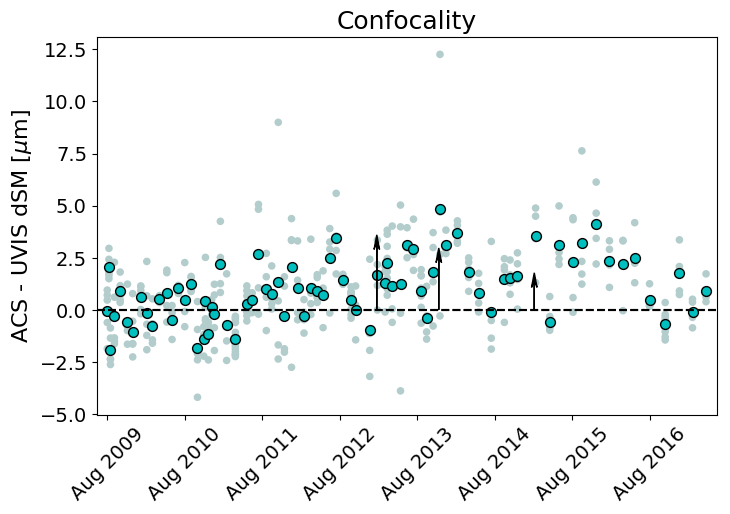

In [9]:
data.plot_confocality(figsize = (8, 5))